<a href="https://colab.research.google.com/github/angelina6k/NM/blob/main/%D0%9B%D1%8011_%D0%9A%D0%B0%D0%BB%D1%96%D0%BD%D1%96%D1%87%D0%B5%D0%BD%D0%BA%D0%BE_%D0%92%D0%B0%D1%80%D1%96%D0%B0%D0%BD%D1%82_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Метод найменших квадратів (МНК)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Функція для вашого варіанту 9
def func(x):
    return 2 * np.sin(5 * x)

# Загальні дані (x = 0.1, 0.2, ..., 1.0)
x = np.array([i * 0.1 for i in range(1, 11)])
y = np.array([func(xi) for xi in x])

print('x =', x)
print('y =', y)


x = [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
y = [ 0.95885108  1.68294197  1.99498997  1.81859485  1.19694429  0.28224002
 -0.70156646 -1.51360499 -1.95506024 -1.91784855]


Аналітична лінія: y = -4.689362126772 x + 2.763797364460


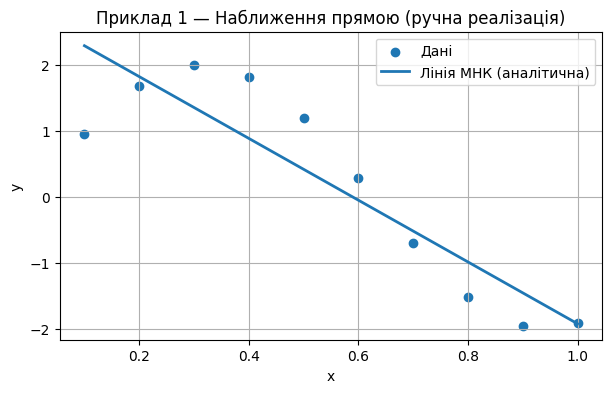

In [ ]:
# --- Приклад 1. Наближення прямою. Реалізація метода вручну
n = len(x)
x_mean = np.mean(x)
y_mean = np.mean(y)

# Обчислення коефіцієнтів a та b для лінії y = ax + b
a = (n * np.sum(x * y) - np.sum(x) * np.sum(y)) / (n * np.sum(x**2) - np.sum(x)**2)
b = y_mean - a * x_mean

# Виведення результатів
print(f"Аналітична лінія: y = {a:.12f} x + {b:.12f}")

# Побудова графіка
x_line = np.linspace(min(x), max(x), 300)
plt.figure(figsize=(7,4))
plt.scatter(x, y, label='Дані')
plt.plot(x_line, a * x_line + b, label='Лінія МНК (аналітична)', linewidth=2)
plt.title('Приклад 1 — Наближення прямою (ручна реалізація)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()


polyfit (лінія): y = -4.689362126772 x + 2.763797364460


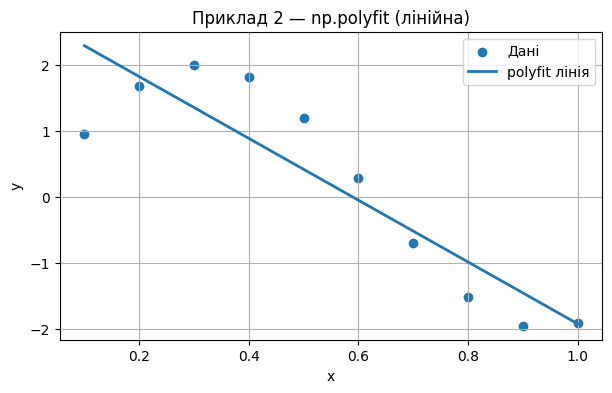

In [ ]:
# --- Приклад 2. Реалізація МНК наближення прямою за допомогою polyfit()
coeff_lin = np.polyfit(x, y, 1)
a_pf, b_pf = coeff_lin
print(f"polyfit (лінія): y = {a_pf:.12f} x + {b_pf:.12f}")

# Побудова графіка
poly_lin = np.poly1d(coeff_lin)
plt.figure(figsize=(7,4))
plt.scatter(x, y, label='Дані')
plt.plot(np.linspace(min(x), max(x), 300), poly_lin(np.linspace(min(x), max(x), 300)), label='polyfit лінія', linewidth=2)
plt.title('Приклад 2 — np.polyfit (лінійна)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()


polyfit (парабола): y = -6.078571499566 x^2 + 1.997066522751 x + 1.426511634556


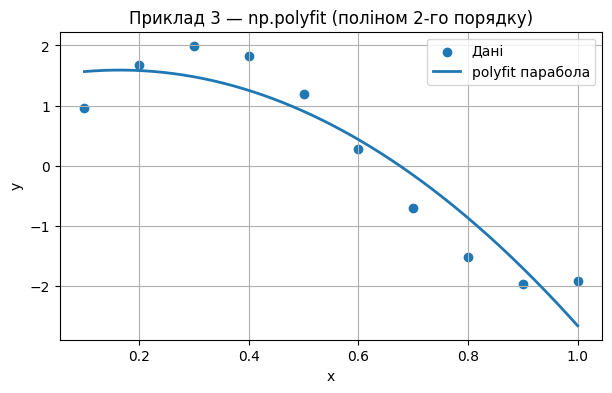

In [ ]:
# --- Приклад 3. Реалізація МНК наближення параболою за допомогою polyfit()
coeff_quad = np.polyfit(x, y, 2)
a2, a1, a0 = coeff_quad
print(f"polyfit (парабола): y = {a2:.12f} x^2 + {a1:.12f} x + {a0:.12f}")


# Графік
poly_quad = np.poly1d(coeff_quad)
plt.figure(figsize=(7,4))
plt.scatter(x, y, label='Дані')
plt.plot(np.linspace(min(x), max(x), 300), poly_quad(np.linspace(min(x), max(x), 300)), label='polyfit парабола', linewidth=2)
plt.title('Приклад 3 — np.polyfit (поліном 2-го порядку)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()


a0 = 1.426512, a1 = 1.997066, a2 = -6.078571


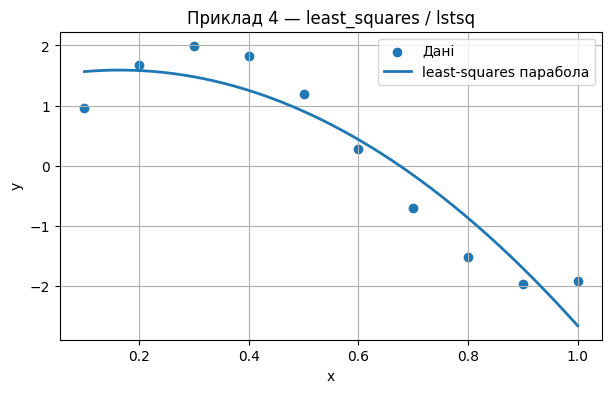

In [ ]:
# --- Приклад 4. Наближення параболою за допомогою least_squares ()

# Функція для мінімізації
def fun(a, x, y):
    return a[0] + a[1] * x + a[2] * x**2 - y

# Початкові наближення коефіцієнтів полінома
a0 = np.array([1, 1, 1])

# Використовуємо least_squares для знаходження оптимальних параметрів
res_lsq = least_squares(fun, x0=a0, args=(x, y))

# Виведення коефіцієнтів поліному
print("a0 = %.6f, a1 = %.6f, a2 = %.6f" % tuple(res_lsq.x))

# Функція апроксимації з отриманими коефіцієнтами
def f(x):
    return res_lsq.x[0] + res_lsq.x[1] * x + res_lsq.x[2] * x**2

# Побудова графіка
x_p = np.linspace(min(x), max(x), 100)  # Точки для графіка апроксимованої функції
y_p = f(x_p)


# Графік
plt.figure(figsize=(7,4))
plt.scatter(x, y, label='Дані')
plt.plot(np.linspace(min(x), max(x), 300), f_approx(np.linspace(min(x), max(x), 300)), label='least-squares парабола', linewidth=2)
plt.title('Приклад 4 — least_squares / lstsq')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()
